Project Title :- 
Smart Flood Early Warning and Risk Management System

Problem Statement :- 
Floods are occurring more often and with greater intensity because of climate change. Many areas still do not have effective early warning systems. We need a reliable solution to predict risks and send timely alerts to help reduce the impacts of disasters.

Description :-
This project aims to predict flood risks using past data, including rainfall, temperature, soil moisture, and river discharge. It estimates future water levels by classifying results into safe, alert, or danger zones. This approach supports climate change response and disaster management with early warning and preparedness measures.

In [5]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load the dataset
df = pd.read_csv("flood.csv")

   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  

First 5 rows:
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalV

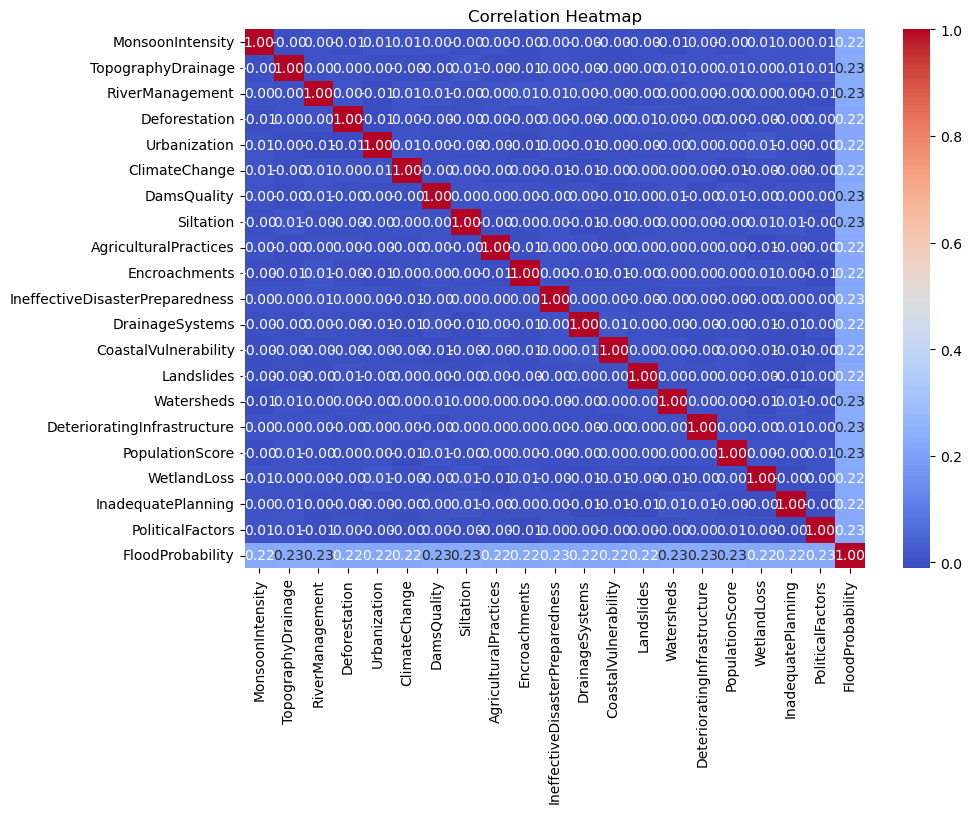

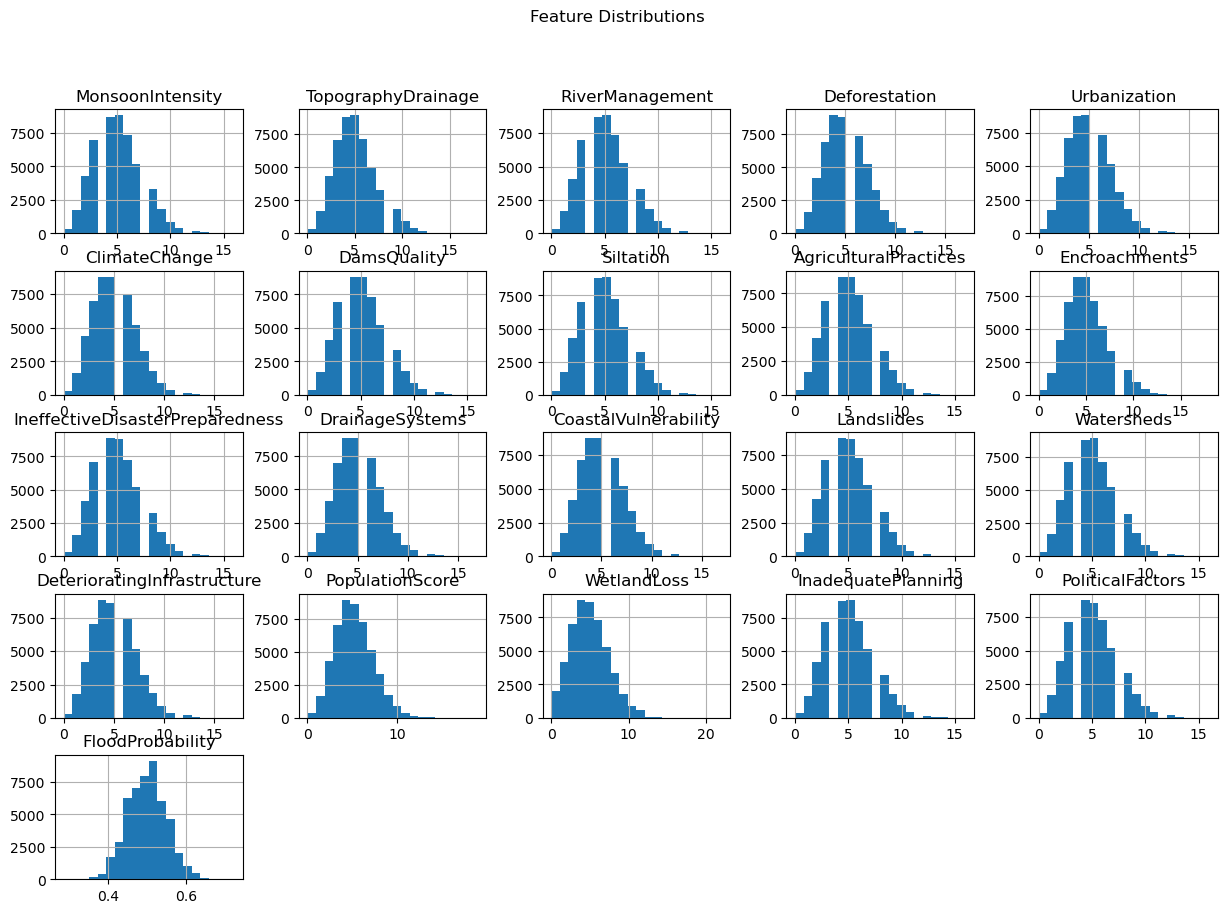

In [ ]:
#Exploratory Data Analysis
print("First 5 rows:")
print(df.head())
print("\n Dataset Info:")
print(df.info())
print("\n Statistical Summary:")
print(df.describe())
print("\n Missing Values Check:")
print(df.isnull().sum())
# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution plots
num_cols = df.select_dtypes(include=[np.number]).columns  # automatically pick numeric
df[num_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

In [7]:
# Data Transformation 
# Fill missing values (if any)
df.fillna(df.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["FloodProbability"]))

# Replace with scaled
X = pd.DataFrame(scaled_features, columns=df.drop(columns=["FloodProbability"]).columns)
y = df["FloodProbability"]

In [8]:
# Feature Selection 
print("\n🔍 Correlation with target (FloodProbability):")
print(df.corr()["FloodProbability"].sort_values(ascending=False))


🔍 Correlation with target (FloodProbability):
FloodProbability                   1.000000
DeterioratingInfrastructure        0.229444
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227467
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225126
PoliticalFactors                   0.225009
MonsoonIntensity                   0.224081
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
Landslides                         0.222991
AgriculturalPractices              0.221846
ClimateChange                      0.220986
Urbanization                       0.220867
Deforestation                      0.220237
Encroachments                      0.218259
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Name: FloodProbability, dtype